In [1]:
from pathlib import Path
import sys
import os 
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path.cwd().parent  # up one level
# project_root = Path.cwd().parent.parent  # up two levels, etc.
print("project_root:", project_root.resolve())

sys.path.append(project_root)

project_root: /mnt/home-data/lucas/projects/uoc/tfm/stock-options


In [2]:
import polars as pl 
data_dir = project_root / "data"
print("data_dir:", data_dir.resolve())

data_dir: /mnt/home-data/lucas/projects/uoc/tfm/stock-options/data


In [3]:
df = pl.read_csv(data_dir / "stock_data_2025_09_10.csv")
df

company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""ABN.AS""","""2025-03-27""",20.280001,20.35,20.17,20.280001,20.280001,748681
"""HEIA.AS""","""2025-03-27""",74.980003,75.239998,74.519997,74.839996,74.839996,100558
"""INGA.AS""","""2025-03-27""",18.610001,18.816,18.514,18.733999,18.733999,2113426
"""RAND.AS""","""2025-03-27""",40.830002,42.0,40.830002,41.779999,41.779999,64286
"""TKWY.AS""","""2025-03-27""",19.6,19.6,19.530001,19.545,19.545,81920
…,…,…,…,…,…,…,…
"""YUM""","""2025-09-10""",145.419998,146.199997,144.850006,146.110001,146.110001,140555
"""ZBH""","""2025-09-10""",103.209999,104.07,102.949997,104.023598,104.023598,148346
"""ZBRA""","""2025-09-10""",311.959991,316.220001,311.470001,316.220001,316.220001,31543


In [4]:
df.sort("date")

company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""AEP""","""1962-01-02""",0.0,35.125,34.3125,34.3125,0.923928,5800
"""BA""","""1962-01-02""",0.837449,0.837449,0.823045,0.823045,0.190931,352350
"""BP""","""1962-01-02""",0.0,0.716684,0.706999,0.706999,0.046369,77440
"""CAT""","""1962-01-02""",1.604167,1.619792,1.588542,1.604167,0.469586,163200
"""CNP""","""1962-01-02""",0.0,10.865333,10.783375,10.783375,0.290679,13879
…,…,…,…,…,…,…,…
"""YUM""","""2025-09-10""",145.419998,146.199997,144.850006,146.110001,146.110001,140555
"""ZBH""","""2025-09-10""",103.209999,104.07,102.949997,104.023598,104.023598,148346
"""ZBRA""","""2025-09-10""",311.959991,316.220001,311.470001,316.220001,316.220001,31543


Filter all dates before 2004

In [5]:
df = df.filter(pl.col("date") >= "2004-01-01").sort("date")
df

company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""AC.PA""","""2004-01-01""",25.299709,25.299709,25.299709,25.299709,4.469719,0
"""ACA.PA""","""2004-01-01""",16.569773,16.569773,16.569773,16.569773,-51.994499,0
"""ACS.MC""","""2004-01-01""",12.751704,12.751704,12.751704,12.751704,4.012496,0
"""ACX.MC""","""2004-01-01""",9.345,9.345,9.345,9.345,3.718852,0
"""AI.PA""","""2004-01-01""",27.00489,27.00489,27.00489,27.00489,16.014681,0
…,…,…,…,…,…,…,…
"""YUM""","""2025-09-10""",145.419998,146.199997,144.850006,146.110001,146.110001,140555
"""ZBH""","""2025-09-10""",103.209999,104.07,102.949997,104.023598,104.023598,148346
"""ZBRA""","""2025-09-10""",311.959991,316.220001,311.470001,316.220001,316.220001,31543


# EDA (Exploratory Data Analysis)

In [6]:
df.describe()

statistic,company_code,date,open,high,low,close,adj_close,volume
str,str,str,f64,f64,f64,f64,f64,f64
"""count""","""3194079""","""3194079""",3.194079e6,3.194079e6,3.194079e6,3.194079e6,3.194079e6,3.194079e6
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,102.205365,103.097353,100.819775,102.221626,91.766412,7.1467e6
"""std""",null,null,559.792572,560.891381,553.281994,560.044926,540.589591,3.8388e7
"""min""","""A""","""2004-01-01""",0.0,0.001,0.001,0.001,-64.730209,0.0
"""25%""",null,null,22.584999,22.877501,22.280001,22.584999,16.4156,791300.0
"""50%""",null,null,44.860001,45.360001,44.341343,44.869999,34.636845,1.985924e6
"""75%""",null,null,86.650002,87.550003,85.720001,86.660004,75.395126,4.896e6
"""max""","""ZTS""","""2025-09-10""",108601.0,109500.0,108001.0,109050.0,109050.0,5.0889e9


In [7]:
# Show first 5 rows
df.head()


company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""AC.PA""","""2004-01-01""",25.299709,25.299709,25.299709,25.299709,4.469719,0
"""ACA.PA""","""2004-01-01""",16.569773,16.569773,16.569773,16.569773,-51.994499,0
"""ACS.MC""","""2004-01-01""",12.751704,12.751704,12.751704,12.751704,4.012496,0
"""ACX.MC""","""2004-01-01""",9.345,9.345,9.345,9.345,3.718852,0
"""AI.PA""","""2004-01-01""",27.00489,27.00489,27.00489,27.00489,16.014681,0


In [8]:
# Show schema and dtypes
print("Schema:", df.schema)


Schema: Schema({'company_code': String, 'date': String, 'open': Float64, 'high': Float64, 'low': Float64, 'close': Float64, 'adj_close': Float64, 'volume': Int64})


In [9]:
# Show null counts
print("Null counts:")
print(df.null_count())

Null counts:
shape: (1, 8)
┌──────────────┬──────┬──────┬──────┬─────┬───────┬───────────┬────────┐
│ company_code ┆ date ┆ open ┆ high ┆ low ┆ close ┆ adj_close ┆ volume │
│ ---          ┆ ---  ┆ ---  ┆ ---  ┆ --- ┆ ---   ┆ ---       ┆ ---    │
│ u32          ┆ u32  ┆ u32  ┆ u32  ┆ u32 ┆ u32   ┆ u32       ┆ u32    │
╞══════════════╪══════╪══════╪══════╪═════╪═══════╪═══════════╪════════╡
│ 0            ┆ 0    ┆ 0    ┆ 0    ┆ 0   ┆ 0     ┆ 0         ┆ 0      │
└──────────────┴──────┴──────┴──────┴─────┴───────┴───────────┴────────┘


In [10]:
# Show descriptive statistics for numeric columns
df.describe()

statistic,company_code,date,open,high,low,close,adj_close,volume
str,str,str,f64,f64,f64,f64,f64,f64
"""count""","""3194079""","""3194079""",3.194079e6,3.194079e6,3.194079e6,3.194079e6,3.194079e6,3.194079e6
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,102.205365,103.097353,100.819775,102.221626,91.766412,7.1467e6
"""std""",null,null,559.792572,560.891381,553.281994,560.044926,540.589591,3.8388e7
"""min""","""A""","""2004-01-01""",0.0,0.001,0.001,0.001,-64.730209,0.0
"""25%""",null,null,22.584999,22.877501,22.280001,22.584999,16.4156,791300.0
"""50%""",null,null,44.860001,45.360001,44.341343,44.869999,34.636845,1.985924e6
"""75%""",null,null,86.650002,87.550003,85.720001,86.660004,75.395126,4.896e6
"""max""","""ZTS""","""2025-09-10""",108601.0,109500.0,108001.0,109050.0,109050.0,5.0889e9


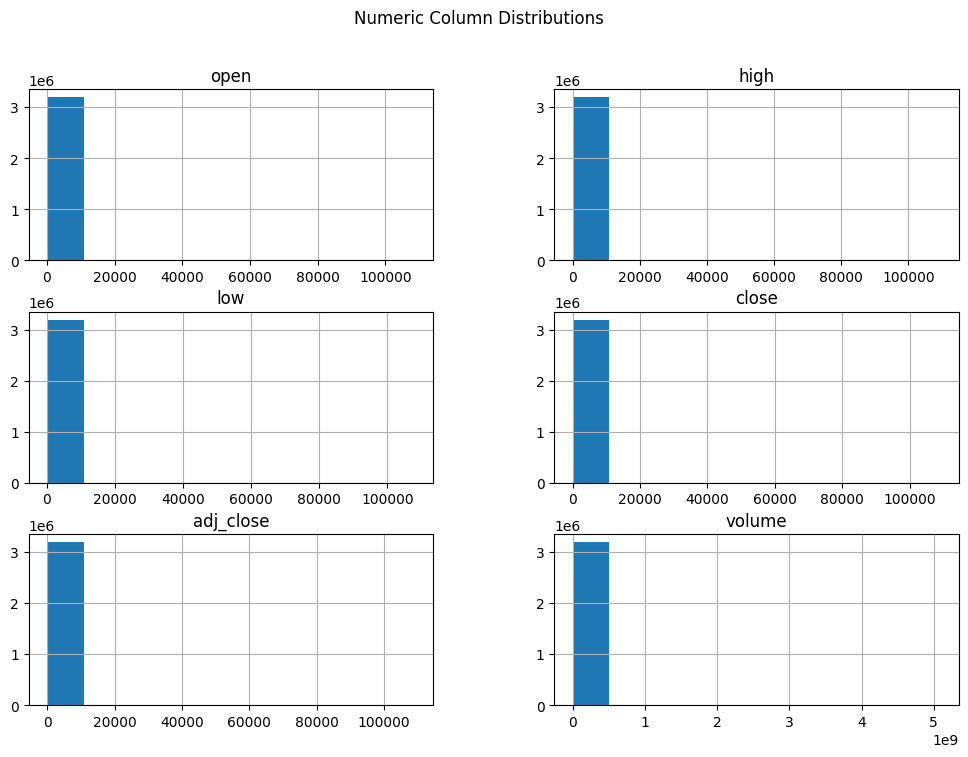

In [11]:
num_cols = [col for col, dtype in df.schema.items() if dtype in (pl.Float64, pl.Int64, pl.Float32, pl.Int32)]
if num_cols:
    df_pd = df.select(num_cols).to_pandas()
    df_pd.hist(bins=10, figsize=(12, 8))
    plt.suptitle("Numeric Column Distributions")
    plt.show()
else:
    print("No numeric columns to plot.")

## Companies
I want to know how many companies there are, and information about them all

In [12]:
companies = df.group_by("company_code").len().sort("len")
print(f"There are {companies.height} unique companies.")

There are 683 unique companies.


In [13]:
companies

company_code,len
str,u32
"""MKS""",1
"""BESI""",3
"""WEIR""",3
"""GAW""",4
"""PRX""",4
…,…
"""ASM.AS""",5540
"""PHIA.AS""",5540
"""AKZA.AS""",5540


how many data has each company?

In [14]:
companies["len"].describe()

statistic,value
str,f64
"""count""",683.0
"""null_count""",0.0
"""mean""",4676.543192
"""std""",1442.911407
"""min""",1.0
"""25%""",4588.0
"""50%""",5434.0
"""75%""",5434.0
"""max""",5540.0


In [15]:
companies["len"].plot.hist()

alt.Chart(...)

Filter companies with not much data

In [16]:
companies.filter(pl.col("len") > 500)

company_code,len
str,u32
"""SN""",508
"""KVUE""",567
"""URW.PA""",591
"""ICG""",601
"""NXT""",625
…,…
"""ASM.AS""",5540
"""PHIA.AS""",5540
"""AKZA.AS""",5540


In [17]:
df_kr = df.filter(pl.col("company_code") == "KR").sort("date")
df_kr

company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""KR""","""2004-01-02""",9.275,9.325,9.175,9.24,6.605384,5722600
"""KR""","""2004-01-05""",9.26,9.38,9.11,9.3,6.648279,6907800
"""KR""","""2004-01-06""",9.3,9.3,9.165,9.24,6.605384,3924600
"""KR""","""2004-01-07""",9.285,9.45,9.215,9.39,6.712618,10096600
"""KR""","""2004-01-08""",9.4,9.495,9.27,9.335,6.673298,5929800
…,…,…,…,…,…,…,…
"""KR""","""2025-08-06""",71.639999,72.32,71.355003,72.209999,72.209999,266335
"""KR""","""2025-08-07""",73.309998,73.745003,73.239998,73.300003,73.300003,277529
"""KR""","""2025-08-08""",73.919998,74.68,73.845001,74.529999,74.529999,764357


In [18]:
df_kr

company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""KR""","""2004-01-02""",9.275,9.325,9.175,9.24,6.605384,5722600
"""KR""","""2004-01-05""",9.26,9.38,9.11,9.3,6.648279,6907800
"""KR""","""2004-01-06""",9.3,9.3,9.165,9.24,6.605384,3924600
"""KR""","""2004-01-07""",9.285,9.45,9.215,9.39,6.712618,10096600
"""KR""","""2004-01-08""",9.4,9.495,9.27,9.335,6.673298,5929800
…,…,…,…,…,…,…,…
"""KR""","""2025-08-06""",71.639999,72.32,71.355003,72.209999,72.209999,266335
"""KR""","""2025-08-07""",73.309998,73.745003,73.239998,73.300003,73.300003,277529
"""KR""","""2025-08-08""",73.919998,74.68,73.845001,74.529999,74.529999,764357


In [19]:
df_kr.filter(pl.col("date").str.contains("2021"))

company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""KR""","""2021-01-04""",31.77,32.259998,31.709999,32.130001,29.324966,11297100
"""KR""","""2021-01-05""",32.009998,32.279999,31.73,31.9,29.115042,9001500
"""KR""","""2021-01-06""",32.040001,32.700001,32.0,32.209999,29.39798,11872200
"""KR""","""2021-01-07""",31.75,32.41,31.700001,31.82,29.04203,9479300
"""KR""","""2021-01-08""",31.870001,31.92,31.43,31.629999,28.868614,9175400
…,…,…,…,…,…,…,…
"""KR""","""2021-12-27""",43.310001,43.799999,43.040001,43.740002,40.734856,3772400
"""KR""","""2021-12-28""",43.790001,44.439999,43.740002,44.419998,41.368134,5230600
"""KR""","""2021-12-29""",44.5,44.880001,44.299999,44.709999,41.63821,3985300


So every year have around 252 days.

In [20]:
days_per_year = 252  # Approximate trading days in a year
years_to_include = 5

Now we filter companies with less than 5 years of data

In [21]:
companies = companies.filter(pl.col("len") > days_per_year * years_to_include)
companies

company_code,len
str,u32
"""PCT""",1274
"""OTIS""",1354
"""CARR""",1354
"""DDOG""",1479
"""REL""",1485
…,…
"""ASM.AS""",5540
"""PHIA.AS""",5540
"""AKZA.AS""",5540


gone from 683 to 644 companies. Nice

Randomly pick 80% of the companies for training, and 20% for testing

In [22]:
# Pick 80% of the companies for training, and 20% for testing
train_frac = 0.8
train_size = int(companies.height * train_frac)
train_companies = companies.head(train_size)["company_code"].to_list()
test_companies = companies.tail(companies.height - train_size)["company_code"].to_list()

In [23]:
print(f"len(train_companies): {len(train_companies)}")
print(f"len(test_companies): {len(test_companies)}")

len(train_companies): 515
len(test_companies): 129


In [24]:
train_df = df.filter(pl.col("company_code").is_in(train_companies))
test_df = df.filter(pl.col("company_code").is_in(test_companies))
print(f"Train set: {train_df.height} rows, Test set: {test_df.height} rows")

Train set: 2463791 rows, Test set: 707708 rows


In [25]:
train_df.write_csv(data_dir / "train_data.csv")
test_df.write_csv(data_dir / "test_data.csv")

In [26]:
test_df.filter(pl.col("company_code") == "WRB").sort("date")

company_code,date,open,high,low,close,adj_close,volume
str,str,f64,f64,f64,f64,f64,i64
"""WRB""","""2004-01-02""",4.603786,4.693333,4.602469,4.666996,3.296864,4004184
"""WRB""","""2004-01-05""",4.666996,4.705185,4.618272,4.641975,3.279188,4061138
"""WRB""","""2004-01-06""",4.64856,4.681481,4.634074,4.644609,3.281049,2628197
"""WRB""","""2004-01-07""",4.641975,4.705185,4.634074,4.688066,3.311749,3682209
"""WRB""","""2004-01-08""",4.705185,4.730206,4.681481,4.709136,3.326632,3504516
…,…,…,…,…,…,…,…
"""WRB""","""2025-08-06""",70.239998,70.339996,70.050003,70.220001,70.220001,125389
"""WRB""","""2025-08-07""",70.370003,70.704697,70.300003,70.419998,70.419998,72232
"""WRB""","""2025-08-08""",70.470001,70.860001,70.415001,70.620003,70.620003,64028
